In [1]:
#import pandas_datareader as pdr

In [2]:
#df = pdr.get_data_tiingo('TSLA',api_key='d28227fe4a80f84690941c6a92f015cf527b8c7a')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('aapl.csv')
df2 = df.reset_index()['close']

In [5]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-02-20 00:00:00+00:00,171.85,174.26,171.42,172.05,33531012,40.901605,41.475203,40.799262,40.949206,134124048,0.0,1.0
1,AAPL,2018-02-21 00:00:00+00:00,171.07,174.12,171.01,172.83,35833514,40.715959,41.441882,40.701678,41.134852,143334056,0.0,1.0
2,AAPL,2018-02-22 00:00:00+00:00,172.50,173.95,171.71,171.80,30504116,41.056310,41.401421,40.868284,40.889704,122016464,0.0,1.0
3,AAPL,2018-02-23 00:00:00+00:00,175.50,175.65,173.54,173.67,33329232,41.770333,41.806034,41.303838,41.334779,133316928,0.0,1.0
4,AAPL,2018-02-26 00:00:00+00:00,178.97,179.39,176.21,176.35,36886432,42.596219,42.696182,41.939318,41.972639,147545728,0.0,1.0


In [6]:
df.shape

(1257, 14)

In [7]:
df2.shape

(1257,)

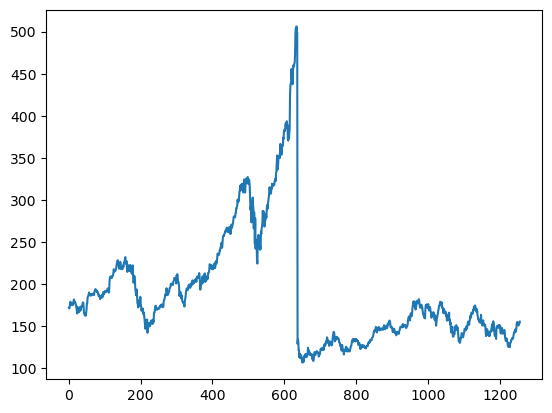

In [8]:
plt.plot(df2)

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [10]:
df1.shape

(1257, 1)

In [11]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]
print(len(train_data))
print(len(test_data))

817
440


In [12]:
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset) - time_step -1 ):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [13]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test, y_test  = create_dataset(test_data,time_step)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(716, 100)
(716,)
(339, 100)
(339,)


In [15]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test =  X_test.reshape(X_test.shape[0]  ,X_test.shape[1],1)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(716, 100, 1)
(716,)
(339, 100, 1)
(339,)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [18]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 392ms/step - loss: 0.0469 - accuracy: 0.0028 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0158 - accuracy: 0.0028 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0115 - accuracy: 0.0028 - val_loss: 4.8484e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 3s 227ms/step - loss: 0.0090 - accuracy: 0.0028 - val_loss: 6.2874e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0083 - accuracy: 0.0028 - val_loss: 6.7555e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 3s 231ms/step - loss: 0.0076 - accuracy: 0.0028 - val_loss: 6.7310e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0066 - accuracy: 0.0028 

12/12 [==============================] - 3s 251ms/step - loss: 0.0023 - accuracy: 0.0028 - val_loss: 2.8821e-04 - val_accuracy: 0.0000e+00
Epoch 56/100
12/12 [==============================] - 3s 250ms/step - loss: 0.0019 - accuracy: 0.0028 - val_loss: 2.4907e-04 - val_accuracy: 0.0000e+00
Epoch 57/100
12/12 [==============================] - 3s 252ms/step - loss: 0.0022 - accuracy: 0.0028 - val_loss: 2.5992e-04 - val_accuracy: 0.0000e+00
Epoch 58/100
12/12 [==============================] - 3s 260ms/step - loss: 0.0018 - accuracy: 0.0028 - val_loss: 2.4949e-04 - val_accuracy: 0.0000e+00
Epoch 59/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0018 - accuracy: 0.0028 - val_loss: 2.4303e-04 - val_accuracy: 0.0000e+00
Epoch 60/100
12/12 [==============================] - 3s 251ms/step - loss: 0.0017 - accuracy: 0.0028 - val_loss: 2.7477e-04 - val_accuracy: 0.0000e+00
Epoch 61/100
12/12 [==============================] - 3s 263ms/step - loss: 0.0017 - accuracy: 0.0028

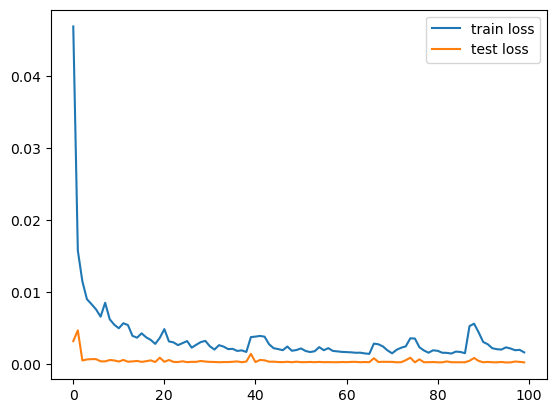

In [21]:
# plot loss per epoch
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend()

In [22]:
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)

11/11 [==============================] - 1s 69ms/step


In [23]:
train_predict = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform(test_predict)

In [24]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

234.6601159153544

In [25]:
math.sqrt(mean_squared_error(y_test,test_predict))

155.32567472732939

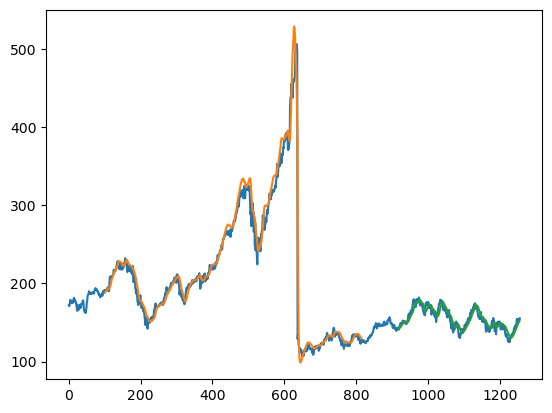

In [26]:
loop_back = 100
# shift train prediction for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[loop_back:len(train_predict)+loop_back,:] = train_predict
# shift test predictionfor plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) +(loop_back*2) +1:len(df1)-1,:] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [27]:
len(test_data)

440

In [28]:
test_data

array([[0.04470883],
       [0.05127113],
       [0.0465623 ],
       [0.05074515],
       [0.05024421],
       [0.05011897],
       [0.0461866 ],
       [0.04450845],
       [0.0436819 ],
       [0.04563557],
       [0.04182843],
       [0.04771446],
       [0.04773951],
       [0.04984346],
       [0.05082029],
       [0.0482655 ],
       [0.05137132],
       [0.05921102],
       [0.05710708],
       [0.05838447],
       [0.06249217],
       [0.05916093],
       [0.06376957],
       [0.06797746],
       [0.06727614],
       [0.06654978],
       [0.06579837],
       [0.06998121],
       [0.07386349],
       [0.07544145],
       [0.07621791],
       [0.08295554],
       [0.08811522],
       [0.09450219],
       [0.09117095],
       [0.09585473],
       [0.09432686],
       [0.09718222],
       [0.1059737 ],
       [0.10429555],
       [0.09906074],
       [0.08919224],
       [0.09845961],
       [0.09658109],
       [0.10008766],
       [0.10449593],
       [0.10557295],
       [0.100

In [29]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input = list(x_input)
temp_input= temp_input[0].tolist()
temp_input

[0.10917971195992482,
 0.11003130870381966,
 0.11251095804633682,
 0.10770194113963677,
 0.08926737633061982,
 0.07854727614276763,
 0.08919223544145266,
 0.09833437695679392,
 0.09908578584846583,
 0.09665623043206006,
 0.08328115216030052,
 0.08410770194113959,
 0.08050093926111451,
 0.07889793362554787,
 0.09054477144646211,
 0.07899812147777074,
 0.08909204758922978,
 0.0924483406386975,
 0.09272385723231058,
 0.09154664996869122,
 0.1012648716343143,
 0.10672510958046327,
 0.11396368190356915,
 0.10647463994990602,
 0.09507827175954914,
 0.1224796493425172,
 0.11646837820914213,
 0.10973074514715087,
 0.0956543519098309,
 0.08025046963055726,
 0.07899812147777074,
 0.08035065748278014,
 0.08180338134001247,
 0.07020663744520972,
 0.10026299311208514,
 0.10735128365685653,
 0.103794614902943,
 0.10820288040075132,
 0.10507201001878513,
 0.10990607388854096,
 0.11133375078271751,
 0.10311834690043825,
 0.10855353788353161,
 0.11078271759549146,
 0.10336881653099561,
 0.0936255479023

In [31]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11518311]
101
1 day input [0.11003131 0.11251096 0.10770194 0.08926738 0.07854728 0.08919224
 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077  0.08050094
 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834 0.09272386
 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464 0.09507827
 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812
 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461
 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354
 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844 0.10386976
 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587
 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449
 0.06376957 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017
 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698
 0.05838447 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666
 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446
 0.09297433 0.09790858 0.09056982 

8 day output [[0.11945149]]
9 day input [0.09665623 0.08328115 0.0841077  0.08050094 0.07889793 0.09054477
 0.07899812 0.08909205 0.09244834 0.09272386 0.09154665 0.10126487
 0.10672511 0.11396368 0.10647464 0.09507827 0.12247965 0.11646838
 0.10973075 0.09565435 0.08025047 0.07899812 0.08035066 0.08180338
 0.07020664 0.10026299 0.10735128 0.10379461 0.10820288 0.10507201
 0.10990607 0.11133375 0.10311835 0.10855354 0.11078272 0.10336882
 0.09362555 0.08598622 0.10316844 0.10386976 0.10261741 0.09966187
 0.0903444  0.08541014 0.08969317 0.08846587 0.09430182 0.09675642
 0.0910958  0.07428929 0.06930495 0.0639449  0.06376957 0.07165936
 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193 0.05783344
 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447 0.05983719
 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823 0.07120852
 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433 0.09790858
 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383 0.11243582
 0.11974953 0.11291171

17 day output [[0.12109022]]
18 day input [0.09272386 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464
 0.09507827 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047
 0.07899812 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128
 0.10379461 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835
 0.10855354 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844
 0.10386976 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317
 0.08846587 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495
 0.0639449  0.06376957 0.07165936 0.06359424 0.0626675  0.05808391
 0.04809017 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538
 0.05705698 0.05838447 0.05983719 0.06675016 0.06654978 0.06993112
 0.07288666 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261
 0.08771446 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623
 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178
 0.11063244 0.11774577 0.11611772 0.12145272 0.11518311 0.11630388
 0.11712122 0.117723

25 day output [[0.12249122]]
26 day input [0.11646838 0.10973075 0.09565435 0.08025047 0.07899812 0.08035066
 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461 0.10820288
 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354 0.11078272
 0.10336882 0.09362555 0.08598622 0.10316844 0.10386976 0.10261741
 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587 0.09430182
 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449  0.06376957
 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193
 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447
 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823
 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433
 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383
 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577
 0.11611772 0.12145272 0.11518311 0.11630388 0.11712122 0.11772352
 0.11819071 0.11857447 0.11890358 0.11919314 0.11945149 0.11968402
 0.11989525 0.120089

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [33]:

len(df1)

1257

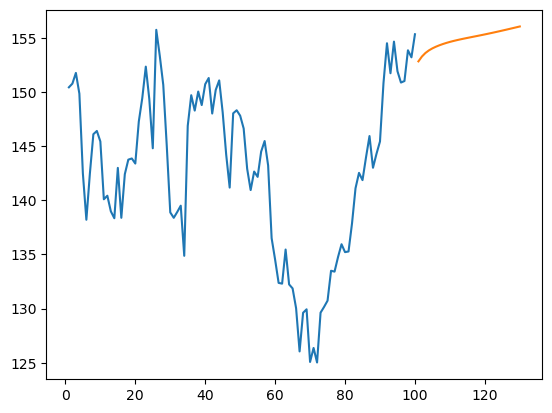

In [35]:

plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

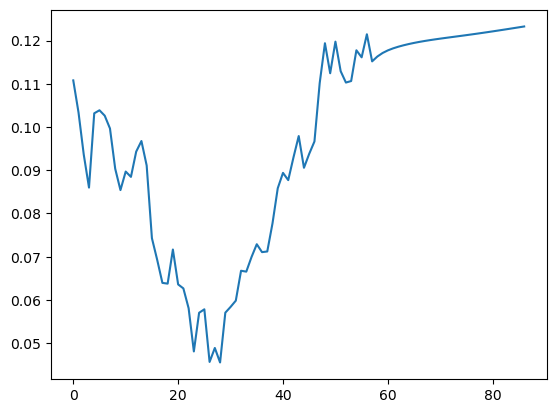

In [36]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [37]:
df3=scaler.inverse_transform(df3).tolist()

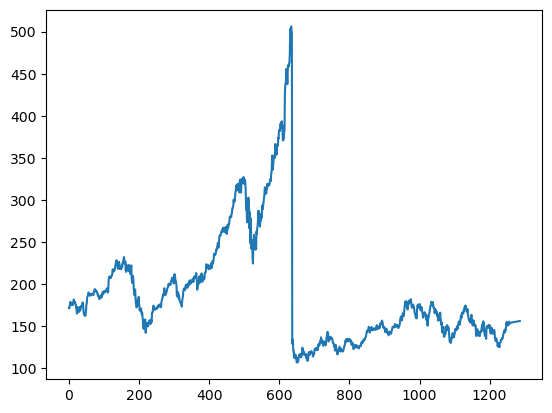

In [38]:
plt.plot(df3)